In [2]:

# Creazione del DataFrame# Importazione delle librerie
import torch 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl


df1 = pd.read_csv('Database_PIL_ITALIA.csv')


In [3]:
# Filtraggio del dataset per il PIL
Tipo_di_dato_pil = ["B1GQ_B_W2_S1_X2"]
Ed_pil = ["Set-2023"]
dati_filtrati_pil = df1[(df1['TIPO_DATO_PIL_SEC2010'].isin(Tipo_di_dato_pil)) &
                        (df1['Edizione'].isin(Ed_pil))]

# Eliminazione delle colonne non necessarie per il PIL
colonne_da_rimuovere_pil = ['Seleziona periodo', 'Flag Codes', 'Flags']
dati_completi_pil = dati_filtrati_pil.drop(columns=colonne_da_rimuovere_pil, axis=1)


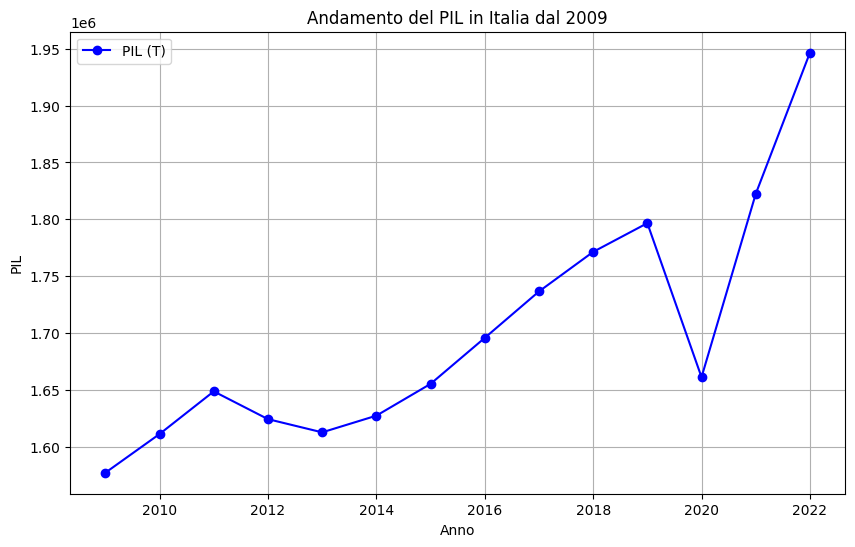

In [4]:
# Preparazione dei dati per il grafico
anni = dati_filtrati_pil['TIME'].values
valori_pil = dati_filtrati_pil['Value'].values

# Grafico dell'andamento del PIL
plt.figure(figsize=(10, 6))
plt.plot(anni, valori_pil, marker='o', linestyle='-', color='b', label='PIL (T)')
plt.title('Andamento del PIL in Italia dal 2009')
plt.xlabel('Anno')
plt.ylabel('PIL')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
# Lettura del dataset Produzione
Tipo_di_dato_prod = ["P1_C_W2_S1"]
Ed_prod = ["Set-2023"]
prezzi = ['prezzi correnti']
dati_filtrati_prod = df1[(df1['TIPO_DATO_PIL_SEC2010'].isin(Tipo_di_dato_prod)) &
                         (df1['Edizione'].isin(Ed_prod)) &
                         (df1['Valutazione'].isin(prezzi))]

# Eliminazione delle colonne non necessarie per la Produzione
colonne_da_rimuovere_prod = ['Seleziona periodo', 'Flag Codes', 'Flags']
dati_completi_prod = dati_filtrati_prod.drop(columns=colonne_da_rimuovere_prod, axis=1)

# Dati da cercare all'interno del DataFrame.
Tipo_di_dato = ["P3_D_W0_S1"]
Ed = ["Set-2023"]
prezzi = ['prezzi correnti']

# Filtra il DataFrame df1 in base ai criteri specificati.
dati_filtrati_rlg = df1[(df1['TIPO_DATO_PIL_SEC2010'].isin(Tipo_di_dato)) &
                      (df1['Edizione'].isin(Ed))&
                      (df1['Valutazione'].isin(prezzi))]

# Concatena le righe filtrate in un unico DataFrame.
dati_completi_3 = pd.concat([dati_filtrati_rlg])

# Eliminiamo le colonne del datbase che non servono
colonne_da_rimuovere = ['Seleziona periodo', 'Flag Codes', 'Flags']
dati_completi_rlg = dati_filtrati_rlg.drop(columns=colonne_da_rimuovere, axis=1)

# Dati da cercare all'interno del DataFrame.
Tipo_di_dato = ["B2A3G_B_W2_S1"]
Ed = ["Set-2023"]

# Filtra il DataFrame df1 in base ai criteri specificati.
dati_filtrati_rm= df1[(df1['TIPO_DATO_PIL_SEC2010'].isin(Tipo_di_dato)) &
                      (df1['Edizione'].isin(Ed))]

# Concatena le righe filtrate in un unico DataFrame.
dati_completi_4 = pd.concat([dati_filtrati_rm])

# Eliminiamo le colonne del datbase che non servono
colonne_da_rimuovere = ['Seleziona periodo', 'Flag Codes', 'Flags']
dati_completi_rm = dati_filtrati_rm.drop(columns=colonne_da_rimuovere, axis=1)

# Conversione in array numpy e poi in tensori
dati_completi_pil = dati_completi_pil.fillna(0)
dati_completi_pil = dati_completi_pil.select_dtypes(include=[np.number])
array_pil = dati_completi_pil.to_numpy()
tensor_pil = torch.tensor(array_pil, dtype=torch.float32)

dati_completi_prod = dati_completi_prod.fillna(0)
dati_completi_prod = dati_completi_prod.select_dtypes(include=[np.number])
array_prod = dati_completi_prod.to_numpy()
tensor_prod = torch.tensor(array_prod, dtype=torch.float32)

dati_completi_rlg = dati_completi_rlg.fillna(0)
dati_completi_rlg = dati_completi_rlg.select_dtypes(include=[np.number])
array_rlg = dati_completi_rlg.to_numpy()
tensor_rlg = torch.tensor(array_rlg, dtype=torch.float32)

dati_completi_rm = dati_completi_rm.fillna(0)
dati_completi_rm = dati_completi_rm.select_dtypes(include=[np.number])
array_rm = dati_completi_rm.to_numpy()
tensor_rm = torch.tensor(array_rm, dtype=torch.float32)

# Normalizzazione dei tensori
tensor_pil_min = tensor_pil.min(dim=0, keepdim=True).values
tensor_pil_max = tensor_pil.max(dim=0, keepdim=True).values
tensor_pil_normalized = (tensor_pil - tensor_pil_min) / (tensor_pil_max - tensor_pil_min)

tensor_prod_min = tensor_prod.min(dim=0, keepdim=True).values
tensor_prod_max = tensor_prod.max(dim=0, keepdim=True).values
tensor_prod_normalized = (tensor_prod - tensor_prod_min) / (tensor_prod_max - tensor_prod_min)

tensor_rlg_min = tensor_rlg.min(dim=0, keepdim=True).values
tensor_rlg_max = tensor_rlg.max(dim=0, keepdim=True).values
tensor_rlg_normalized = (tensor_rlg - tensor_rlg_min) / (tensor_rlg_max - tensor_rlg_min)

tensor_rm_min = tensor_rm.min(dim=0, keepdim=True).values
tensor_rm_max = tensor_rm.max(dim=0, keepdim=True).values
tensor_rm_normalized = (tensor_rm - tensor_rm_min) / (tensor_rm_max - tensor_rm_min)


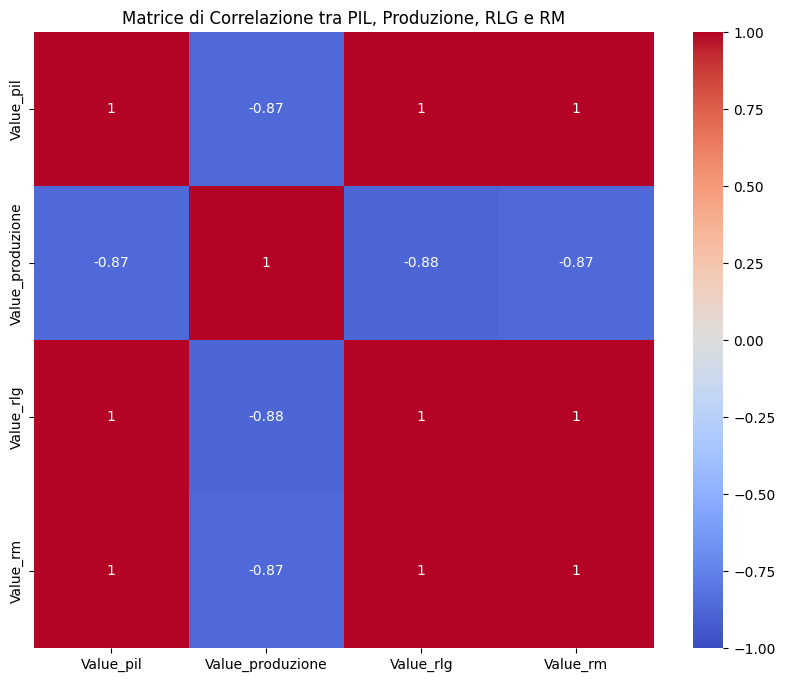

                  Value_pil  Value_produzione  Value_rlg  Value_rm
Value_pil          1.000000         -0.865791   0.997129  0.999637
Value_produzione  -0.865791          1.000000  -0.876046 -0.866388
Value_rlg          0.997129         -0.876046   1.000000  0.997551
Value_rm           0.999637         -0.866388   0.997551  1.000000


In [6]:
dati_filtrati_pil = df1[df1['TIPO_DATO_PIL_SEC2010'] == 'B1GQ_B_W2_S1_X2']
dati_filtrati_produzione = df1[df1['TIPO_DATO_PIL_SEC2010'] == 'P1_C_W2_S1']
dati_filtrati_rlg = df1[df1['TIPO_DATO_PIL_SEC2010'] == 'P3_D_W0_S1']
dati_filtrati_rm = df1[df1['TIPO_DATO_PIL_SEC2010'] == 'B2A3G_B_W2_S1']

# Aggregazione per somma o media, a seconda del caso
dati_aggregati_pil = dati_filtrati_pil.groupby('TIME')['Value'].sum().reset_index(name='Value_pil')
dati_aggregati_produzione = dati_filtrati_produzione.groupby('TIME')['Value'].mean().reset_index(name='Value_produzione')
dati_aggregati_rlg = dati_filtrati_rlg.groupby('TIME')['Value'].sum().reset_index(name='Value_rlg')
dati_aggregati_rm = dati_filtrati_rm.groupby('TIME')['Value'].sum().reset_index(name='Value_rm')

# Unione dei DataFrame in uno singolo
merged_df = pd.merge(dati_aggregati_pil, dati_aggregati_produzione, on='TIME', how='outer')
merged_df = pd.merge(merged_df, dati_aggregati_rlg, on='TIME', how='outer')
merged_df = pd.merge(merged_df, dati_aggregati_rm, on='TIME', how='outer')

# Rimozione delle righe con valori mancanti (NaN)
merged_df.dropna(inplace=True)

# Calcolo della matrice di correlazione
numeric_columns = ['Value_pil', 'Value_produzione', 'Value_rlg', 'Value_rm']
correlation_matrix = merged_df[numeric_columns].corr()

# Visualizzazione della matrice di correlazione tramite heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice di Correlazione tra PIL, Produzione, RLG e RM')
plt.show()
 
print(correlation_matrix)


In [7]:
# Funzione per creare le sequenze temporali con PIL, Produzione, RLG, RM
def create_sequences(tensor_pil, tensor_prod, tensor_rlg, tensor_rm, seq_length):
    sequences = []
    targets = []
    for i in range(len(tensor_pil) - seq_length):
        seq_pil = tensor_pil[i:i+seq_length, :]
        seq_prod = tensor_prod[i:i+seq_length, :]
        seq_rlg = tensor_rlg[i:i+seq_length, :]
        seq_rm = tensor_rm[i:i+seq_length, :]
        target = tensor_pil[i+seq_length, 1]  # Prendiamo solo il PIL come target
        sequences.append((seq_pil, seq_prod, seq_rlg, seq_rm))
        targets.append(target)
    return sequences, torch.tensor(targets)

# Crea le sequenze e i target con PIL, Produzione, RLG, RM
seq_length = 3
sequences, targets = create_sequences(tensor_pil_normalized, tensor_prod_normalized, tensor_rlg_normalized, tensor_rm_normalized, seq_length)

# Creazione del DataLoader
dataset = TensorDataset(torch.stack([seq[0] for seq in sequences]), 
                        torch.stack([seq[1] for seq in sequences]), 
                        torch.stack([seq[2] for seq in sequences]), 
                        torch.stack([seq[3] for seq in sequences]), 
                        targets)
batch_size = 1  # Scegli il batch size appropriato
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Definizione del modello LSTM con input aggiornati
class LSTMModel(nn.Module):
    def __init__(self, input_size_pil, input_size_prod, input_size_rlg, input_size_rm, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm_pil = nn.LSTM(input_size_pil, hidden_size, num_layers, batch_first=True)
        self.lstm_prod = nn.LSTM(input_size_prod, hidden_size, num_layers, batch_first=True)
        self.lstm_rlg = nn.LSTM(input_size_rlg, hidden_size, num_layers, batch_first=True)
        self.lstm_rm = nn.LSTM(input_size_rm, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x_pil, x_prod, x_rlg, x_rm):
        h0 = torch.zeros(self.num_layers, x_pil.size(0), self.hidden_size).to(x_pil.device)
        c0 = torch.zeros(self.num_layers, x_pil.size(0), self.hidden_size).to(x_pil.device)
        
        out_pil, _ = self.lstm_pil(x_pil, (h0, c0))
        out_prod, _ = self.lstm_prod(x_prod, (h0, c0))
        out_rlg, _ = self.lstm_rlg(x_rlg, (h0, c0))
        out_rm, _ = self.lstm_rm(x_rm, (h0, c0))
        
        out_combined = out_pil[:, -1, :] + out_prod[:, -1, :] + out_rlg[:, -1, :] + out_rm[:, -1, :]  # Combinazione degli output LSTM
        out = self.fc(out_combined)
        return out

# Parametri del modello
input_size_pil = tensor_pil_normalized.shape[1]  # Numero di caratteristiche in ciascun passo temporale per il PIL
input_size_prod = tensor_prod_normalized.shape[1]  # Numero di caratteristiche in ciascun passo temporale per la Produzione
input_size_rlg = tensor_rlg_normalized.shape[1]  # Numero di caratteristiche in ciascun passo temporale per il RLG
input_size_rm = tensor_rm_normalized.shape[1]  # Numero di caratteristiche in ciascun passo temporale per il RM
hidden_size = 64
num_layers = 1
output_size = 1

# Crea un'istanza del modello
model = LSTMModel(input_size_pil, input_size_prod, input_size_rlg, input_size_rm, hidden_size, num_layers, output_size)

# Definizione della funzione di perdita e dell'ottimizzatore
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [8]:
# Addestramento del modello
num_epochs = 100
for epoch in range(num_epochs):
    model.train() 
    epoch_loss = 0.0
    for batch_seq_pil, batch_seq_prod, batch_seq_rlg, batch_seq_rm, batch_target in dataloader:
        optimizer.zero_grad()
        output = model(batch_seq_pil, batch_seq_prod, batch_seq_rlg, batch_seq_rm)
        loss = criterion(output.squeeze(), batch_target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(dataloader):.4f}')


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 0.0262
Epoch [20/100], Loss: 0.0228
Epoch [30/100], Loss: 0.0210
Epoch [40/100], Loss: 0.0191
Epoch [50/100], Loss: 0.0169
Epoch [60/100], Loss: 0.0148
Epoch [70/100], Loss: 0.0130
Epoch [80/100], Loss: 0.0118
Epoch [90/100], Loss: 0.0110
Epoch [100/100], Loss: 0.0105


Valore previsto per l'anno 2023: 1937214.00
Valore previsto per l'anno 2024: 2872532.00
Valore previsto per l'anno 2025: 3116587.00
Valore previsto per l'anno 2026: 3133729.00
Valore previsto per l'anno 2027: 3134091.50


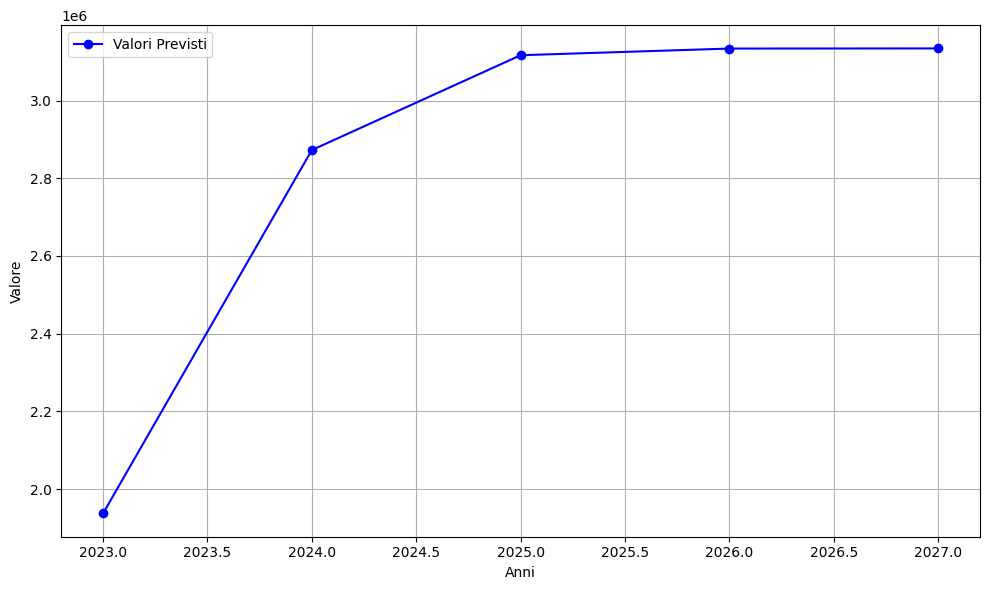

In [11]:
# Numero di predizioni future da fare
num_predictions = 5
valori_predetti = []

model.eval()
with torch.no_grad():
    ultima_sequenza_pil = sequences[-1][0].unsqueeze(0)  # Ultima sequenza PIL
    ultima_sequenza_prod = sequences[-1][1].unsqueeze(0)  # Ultima sequenza Produzione
    ultima_sequenza_rlg = sequences[-1][2].unsqueeze(0)  # Ultima sequenza RLG
    ultima_sequenza_rm = sequences[-1][3].unsqueeze(0)  # Ultima sequenza RM
    for _ in range(num_predictions):
        valore_predetto_normalizzato = model(ultima_sequenza_pil, ultima_sequenza_prod, ultima_sequenza_rlg, ultima_sequenza_rm).item()
        valore_predetto = valore_predetto_normalizzato * (tensor_pil_max[0, 1] - tensor_pil_min[0, 1]) + tensor_pil_min[0, 1]
        valori_predetti.append(valore_predetto)

        # Aggiorna le sequenze con la nuova previsione
        nuova_sequenza_pil = torch.cat((ultima_sequenza_pil[:, 1:, :], torch.tensor([[[tensor_pil[-1, 0] + 1, valore_predetto_normalizzato]]], dtype=torch.float32)), dim=1)
        nuova_sequenza_prod = torch.cat((ultima_sequenza_prod[:, 1:, :], torch.tensor([[[tensor_prod[-1, 0] + 1, valore_predetto_normalizzato]]], dtype=torch.float32)), dim=1)
        nuova_sequenza_rlg = torch.cat((ultima_sequenza_rlg[:, 1:, :], torch.tensor([[[tensor_rlg[-1, 0] + 1, valore_predetto_normalizzato]]], dtype=torch.float32)), dim=1)
        nuova_sequenza_rm = torch.cat((ultima_sequenza_rm[:, 1:, :], torch.tensor([[[tensor_rm[-1, 0] + 1, valore_predetto_normalizzato]]], dtype=torch.float32)), dim=1)
        
        ultima_sequenza_pil = nuova_sequenza_pil
        ultima_sequenza_prod = nuova_sequenza_prod
        ultima_sequenza_rlg = nuova_sequenza_rlg
        ultima_sequenza_rm = nuova_sequenza_rm

# Stampa le previsioni
for i, valore in enumerate(valori_predetti, 1):
    print(f'Valore previsto per l\'anno {int(tensor_pil[-1, 0].item()) + i}: {valore:.2f}')

# Prepara i dati per il grafico
anni = range(int(tensor_pil[-1, 0].item()) + 1, int(tensor_pil[-1, 0].item()) + num_predictions + 1)

# Grafico delle previsioni
plt.figure(figsize=(10, 6))
plt.plot(anni, valori_predetti, marker='o', linestyle='-', color='b', label='Valori Previsti')
plt.title('')
plt.xlabel('Anni')
plt.ylabel('Valore')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

